In [1]:
from phi.torch.flow import* 
import pylab as plt

In [2]:
# some constants 
g = 9.81

$ \Delta x =  v_0t +  \frac{1}{2}g t^2 $

$ x = x_0 + \Delta x $

In [3]:
def analytical_solution(p0, v0, t):
    return math.vec(x = p0['x'] + v0['x'] * t,
                    y = p0['y'] + v0['y'] * t - 0.5 * g * t ** 2)

$\frac{\partial p}{\partial t} = v + at$ 

$p_{i + 1} = p_i + \Delta t\frac{\partial p}{\partial t}$

In [4]:
def euler_soution(p, v, dt):
    return math.vec(x = p['x'] + v['x'] * dt, y = p['y'] + v['y'] * dt - g * dt ** 2 ), math.vec(x = v['x'], y = v['y'] - 9.81 * dt)

In [5]:
p0 = math.vec(x = 0, y = 0)
v0 = math.vec(x = 1e3, y = 1e3)

In [6]:
T = 2e2
def animate_euler(p0, v0, dt):
    X,V = [p0], [v0]
    for t in range(int(T / dt)):
        x, v = euler_soution(X[-1], V[-1], dt)
        X.append(x)
        V.append(v) 
    return X, V

def animate_analytical_solution(p0, v0, dt):
    analytical_trj = []
    return [analytical_solution(p0, v0, dt*t) for t in range(int(T / dt) + 1)]

def plot_solutions(euler_solution, analytical_solution):
    x_analtical, y_analitical = [x for x in analytical_solution.points[:].vector['x']], [x for x in analytical_solution.points[:].vector['y']] 
    x_euler, y_euler = [x for x in euler_solution.points[:].vector['x']], [x for x in euler_solution.points[:].vector['y']] 
    error = [i for i in analytical_solution.points[:]['y'] - euler_solution.points[:]['y']]

    fig = plt.figure()

    ax1 = fig.add_subplot(111)
    ax1.scatter(x_analtical, y_analitical,  c='b', marker="s", label='analytical_solution')
    ax1.scatter(x_euler, y_euler, c='r', marker="o", label='euler_solution')
    ax1.scatter(x_analtical, error, c='c', marker="*", label='error')
    plt.legend(loc='upper right')
    plt.show()

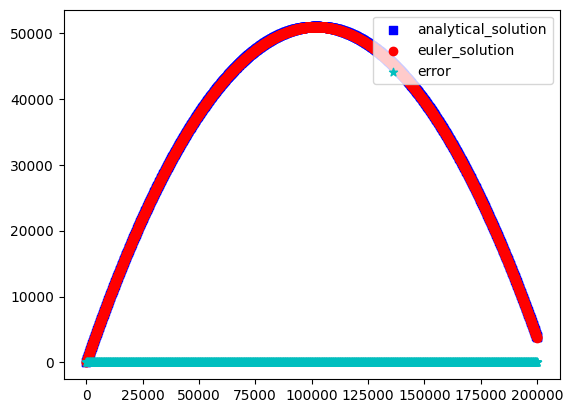

In [7]:
dt = 0.1
analytical_trj_1 = stack(animate_analytical_solution(p0, v0, dt), instance('points'))
euler_1 = stack(animate_euler(p0, v0, dt)[0], instance('points'))
plot_solutions(euler_1, analytical_trj_1)

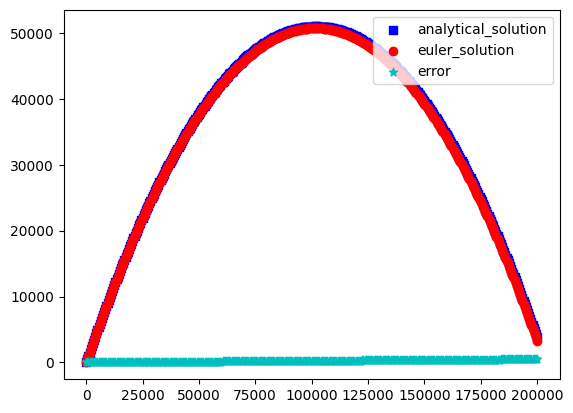

In [8]:
dt = .5
analytical_trj_2 = stack(animate_analytical_solution(p0, v0, dt), instance('points'))
euler_2 = stack(animate_euler(p0, v0, dt)[0], instance('points'))
plot_solutions(euler_2, analytical_trj_2)

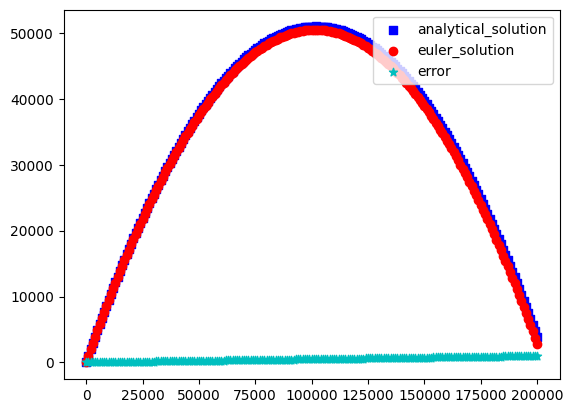

In [13]:
dt = 1
analytical_trj_3 = stack(animate_analytical_solution(p0, v0, dt), instance('points'))
euler_3 = stack(animate_euler(p0, v0, dt)[0], instance('points'))
plot_solutions(euler_3, analytical_trj_3)

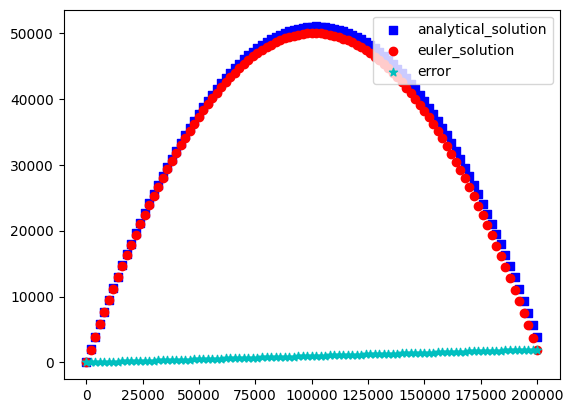

In [11]:
dt = 2
analytical_trj_4 = stack(animate_analytical_solution(p0, v0, dt), instance('points'))
euler_4 = stack(animate_euler(p0, v0, dt)[0], instance('points'))
plot_solutions(euler_4, analytical_trj_4)

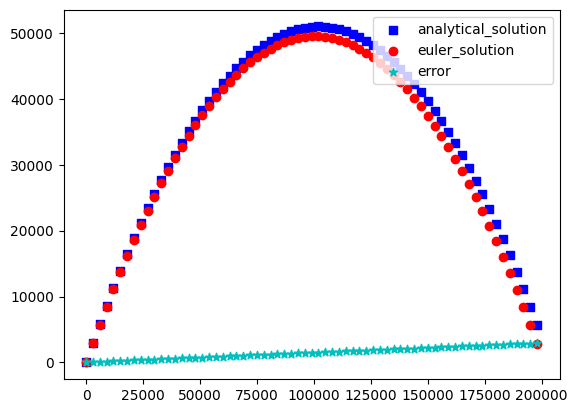

In [12]:
dt = 3
analytical_trj_5 = stack(animate_analytical_solution(p0, v0, dt), instance('points'))
euler_5 = stack(animate_euler(p0, v0, dt)[0], instance('points'))
plot_solutions(euler_5, analytical_trj_5)

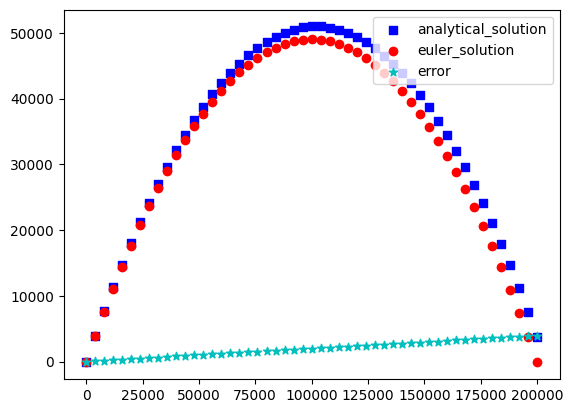

In [69]:
dt = 4
analytical_trj_6 = stack(animate_analytical_solution(p0, v0, dt), instance('points'))
euler_6 = stack(animate_euler(p0, v0, dt)[0], instance('points'))
plot_solutions(euler_6, analytical_trj_6)


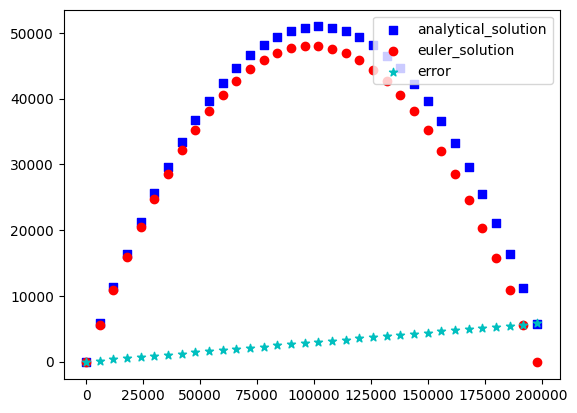

In [70]:
dt = 6
analytical_trj_7 = stack(animate_analytical_solution(p0, v0, dt), instance('points'))
euler_7 = stack(animate_euler(p0, v0, dt)[0], instance('points'))
plot_solutions(euler_7, analytical_trj_7)

In [7]:
math.seed(1001)

In [8]:
dt = math.random_uniform(low = 4, high=7)
dt

5.186314

$ \Delta v \approx \frac{x_{i+1} - x_i}{\Delta t}  $

$ \Delta v = a \Delta t $

$ a = g $ and $ \Delta t = dt $

In [26]:
x_euler, v_euler = animate_euler(p0, v0, dt)
x, y = [i['x'] for i in x_euler], [i['y'] for i in x_euler]
x_ref = animate_analytical_solution(p0, v0, dt)

In [13]:
input_features, output_fatures = int(T / dt), int(T / dt) # to displacement from one poin to other
network = dense_net(in_channels=input_features, out_channels=output_fatures, layers=[8, 8], activation='ReLU')
optimizer = adam(net=network, learning_rate=1e-3)

$\frac{\partial p}{\partial t} = v + at$ 

$p_{i + 1} -  p_i = \Delta t\frac{\partial p}{\partial t}$

In [14]:
def loss_function(data: Tensor):
    points = math.stack(data, instance('points'))
    y_values = points.points[:]['y']
    del_y = [y_values[i] - y[i-1] for i in range(1, len(y_values))]
    del_y = tensor(del_y)
    prediction = math.native_call(network, del_y)
    # prediction
    # label = g * dt # actual velocity change in y direction
    return math.l2_loss(prediction)*2./len(y_values) , prediction

# print(f"Initial loss: {loss_function(data=data)}")

In [15]:
print(f"Initial loss: {loss_function(data=x_euler)}")
for i in range(1000):
    loss, prediction = update_weights(network, optimizer, loss_function, data=x_euler)
    if i % 100 == 0:
        print(f"iteration: {i} loss: {loss} ")
print(f"Final loss: {loss}")

Initial loss: (146335.53, (vectorᶜ=38) 32.851 ± 386.144 (-1e+03...8e+02))
iteration: 0 loss: 146335.53 
iteration: 100 loss: 3.0476875 
iteration: 200 loss: 0.001263533 
iteration: 300 loss: 0.0012571483 
iteration: 400 loss: 0.0012494642 
iteration: 500 loss: 0.00124062 
iteration: 600 loss: 0.0012307074 
iteration: 700 loss: 0.001219796 
iteration: 800 loss: 0.0012079405 
iteration: 900 loss: 0.0011951869 
Final loss: 0.0011817161


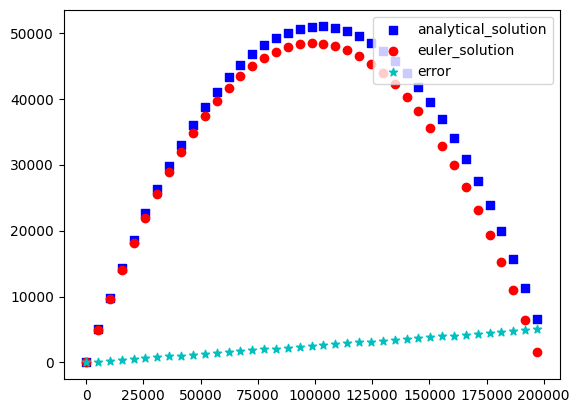

In [32]:
# x_analtical, y_analitical = [float(x['x']) for x in x_ref], [float(x['y']) for x in x_ref] 
# y_app = [float(x['y']) for x in x_euler] 
# network_sol  = [float(x) for x in prediction.value.vector]


# fig = plt.figure()

# ax1 = fig.add_subplot(111)
# ax1.scatter(x_analtical, y_analitical,  c='b', marker="s", label='analytical_solution')
# ax1.scatter(x_analtical, y_app, c='r', marker="o", label='euler_solution')
# plt.legend(loc='upper right')
# plt.show()
plot_solutions(math.stack(x_euler, instance('points'))
               , math.stack(x_ref, instance('points')))

In [72]:
acc_res = [0]
for x, delx in zip(x_euler[1:], prediction.values.vector):
    acc_res.append(x['y'] + delx)

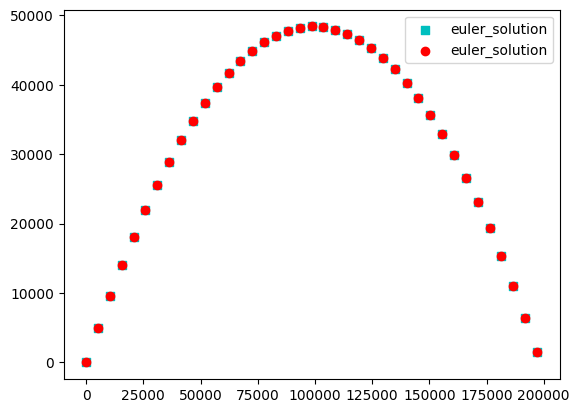

In [77]:
x_analtical, y_analitical = [float(x['x']) for x in x_ref], [float(x['y']) for x in x_ref] 
y_app = [float(x['y']) for x in x_euler] 
fig = plt.figure()
ax1 = fig.add_subplot(111)
# ax1.scatter(x_analtical, y_analitical,  c='b', marker="s", label='analytical_solution')
ax1.scatter(x_analtical, y_app, c='c', marker="s", label='euler_solution')
ax1.scatter(x_analtical, acc_res, c='r', marker="o", label='euler_solution')
plt.legend(loc='upper right')
plt.show()